# Ocean Data Analysis and Regression

In [ ]:
#Explore relationships and correlations between variables
#Create visualizations (move some visualizations?)
#Still remove outliers?
#Create a pipeline
#Add narrative

In [2]:
#Import packages and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.linear_model import Ridge
from scipy.stats import loguniform

In [4]:
#Import data into a DataFrame
ocean_data = pd.read_csv("ocean_data/bottle.csv")

C:\Users\Owner\AppData\Local\Temp\ipykernel_11504\349685118.py:2: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  ocean_data = pd.read_csv("ocean_data/bottle.csv")


## Clean Ocean Data

In [5]:
ocean_data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Review shape of the DataFrame
ocean_data.shape

(864863, 74)

The ocean dataset has a massive number of rows (almost a million!), and a good number of features. The behavior of these features can be seen below with a description of their measures of central tendency.

In [8]:
ocean_data.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [57]:
#Review nulls

nulls = pd.DataFrame(dict(ocean_data.isna().sum()), index=["nulls"])
nulls

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
nulls,0,0,0,0,0,10963,47354,168662,52689,203589,...,639588,0,742857,862864,864639,862779,864629,864853,864779,864808


Some features contain almost all nulls. Fortunately, most of these features correspond to quality codes or statistical precisions of other features. Therefore, most columns can be dropped, which will make analysis much easier.

In [10]:
#Define features to keep in the dataset
features_kept = ["Depthm", "T_degC", "Salnty", "O2ml_L", "STheta", "O2Sat", "Oxy_µmol/Kg", "ChlorA", "Phaeop", "PO4uM", "SiO3uM", "NO2uM", "NO3uM", "NH3uM"]

In [64]:
#Make a copy of the ocean_data dataset
#Can review dropped columns from the ocean_data dataset if needed
clean_data = ocean_data.copy()

In [65]:
#Drop all columns that are not in the features_kept list
for c in clean_data.columns:
    if c not in features_kept:
        clean_data.drop(c, axis=1, inplace=True)
        
clean_data.columns

Index(['Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat',
       'Oxy_µmol/Kg', 'ChlorA', 'Phaeop', 'PO4uM', 'SiO3uM', 'NO2uM', 'NO3uM',
       'NH3uM'],
      dtype='object')

In [66]:
#Review nulls again
clean_data.isna().sum()

Depthm              0
T_degC          10963
Salnty          47354
O2ml_L         168662
STheta          52689
O2Sat          203589
Oxy_µmol/Kg    203595
ChlorA         639591
Phaeop         639592
PO4uM          451546
SiO3uM         510772
NO2uM          527287
NO3uM          527460
NH3uM          799901
dtype: int64

In [14]:
#Review data types
clean_data.dtypes

Depthm           int64
T_degC         float64
Salnty         float64
O2ml_L         float64
STheta         float64
O2Sat          float64
Oxy_µmol/Kg    float64
ChlorA         float64
Phaeop         float64
PO4uM          float64
SiO3uM         float64
NO2uM          float64
NO3uM          float64
NH3uM          float64
dtype: object

In [15]:
clean_data.head(5)

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,ChlorA,Phaeop,PO4uM,SiO3uM,NO2uM,NO3uM,NH3uM
0,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As seen from the displayed data types and top five rows above, all of the features are of type int or float. This means a numerical-based imputer can be used to replace the existing null values. Because there is so much data, a more complex imputer can be used. In this analysis, an iterative imputer will be used, which calculates the missing values using a regression algorithm.

In [67]:
#use a regression imputer to replace remaining NaN values
reg_impute = IterativeImputer(random_state=42)
reg_impute.set_output(transform="pandas")
clean_data = reg_impute.fit_transform(clean_data)

C:\Users\Owner\anaconda3_2023\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [68]:
clean_data

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,ChlorA,Phaeop,PO4uM,SiO3uM,NO2uM,NO3uM,NH3uM
0,0.0,10.500,33.4400,3.416979,25.64900,56.273581,148.883399,0.262948,0.137663,1.591689,21.010183,0.036235,18.663836,0.036667
1,8.0,10.460,33.4400,3.410194,25.65600,56.213957,148.589707,0.238732,0.128307,1.597044,21.571983,0.035478,18.749431,0.035676
2,10.0,10.460,33.4370,3.410326,25.65400,56.255305,148.597157,0.224723,0.123932,1.595923,21.664236,0.035146,18.728219,0.034969
3,19.0,10.450,33.4200,3.415195,25.64300,56.433918,148.815289,0.160169,0.105589,1.590383,22.058831,0.033743,18.634189,0.030344
4,20.0,10.450,33.4210,3.416663,25.64300,56.437271,148.878556,0.159251,0.106183,1.590356,22.096494,0.033803,18.636294,0.030173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,0.0,18.744,33.4083,5.805000,23.87055,108.740000,253.470000,0.905000,0.176000,0.220000,1.770000,0.029000,0.100000,0.020000
864859,2.0,18.744,33.4083,5.805000,23.87072,108.740000,253.470000,0.905000,0.176000,0.220000,1.770000,0.029000,0.100000,0.000000
864860,5.0,18.692,33.4150,5.796000,23.88911,108.460000,253.060000,0.915000,0.182000,0.200000,1.750000,0.027000,0.090000,0.000000
864861,10.0,18.161,33.4062,5.816000,24.01426,107.740000,253.920000,1.078000,0.313000,0.250000,1.990000,0.030000,0.110000,0.120000


In [69]:
#Review nulls again
clean_data.isna().sum()

Depthm         0
T_degC         0
Salnty         0
O2ml_L         0
STheta         0
O2Sat          0
Oxy_µmol/Kg    0
ChlorA         0
Phaeop         0
PO4uM          0
SiO3uM         0
NO2uM          0
NO3uM          0
NH3uM          0
dtype: int64

With all nulls replaced with values from the regression imputer, the behavior of each feature can be explored.

## Exploratory Data Analysis

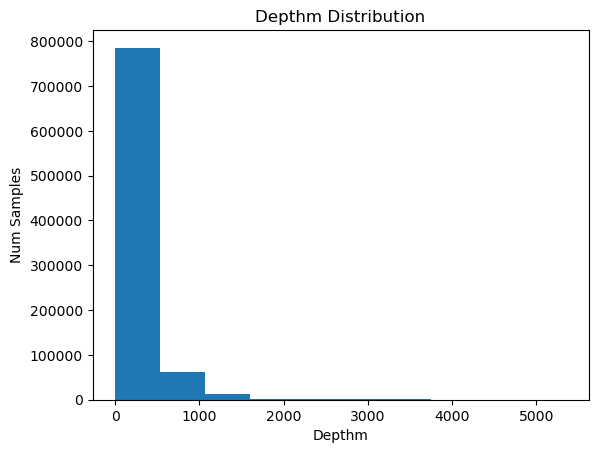

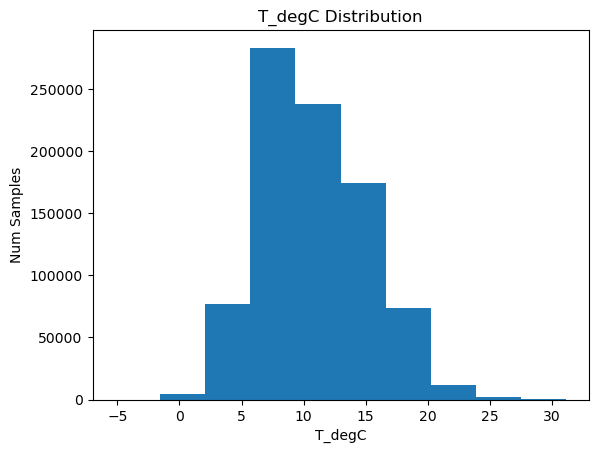

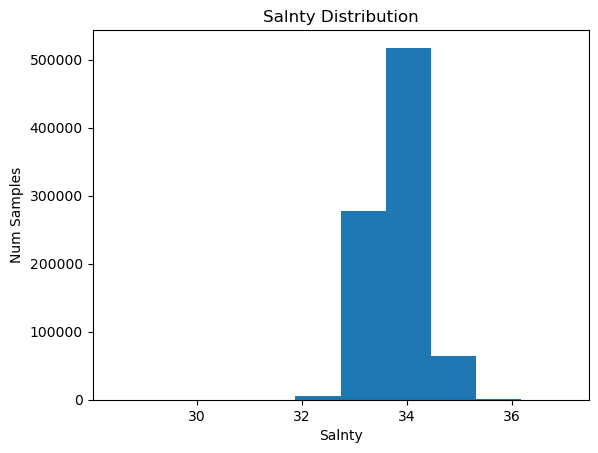

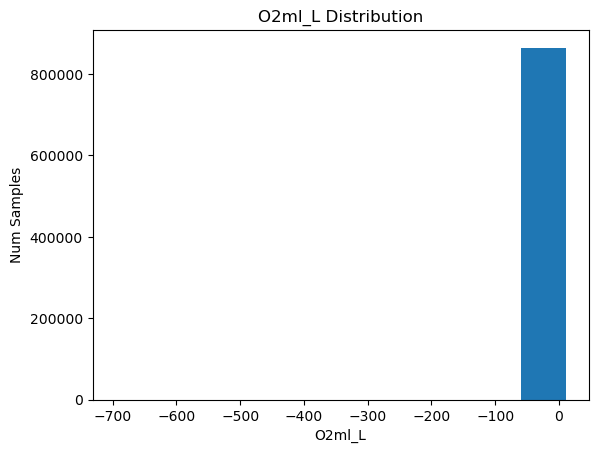

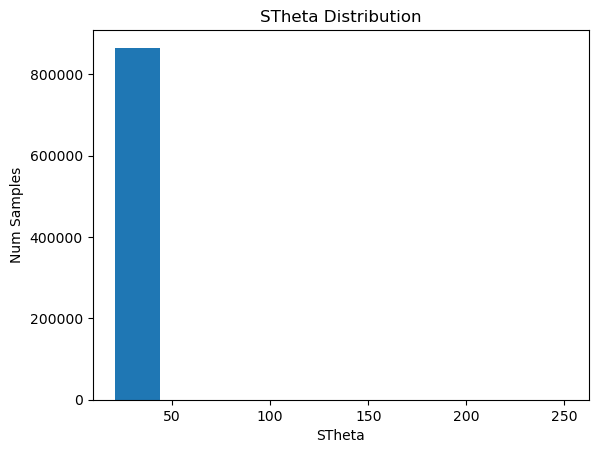

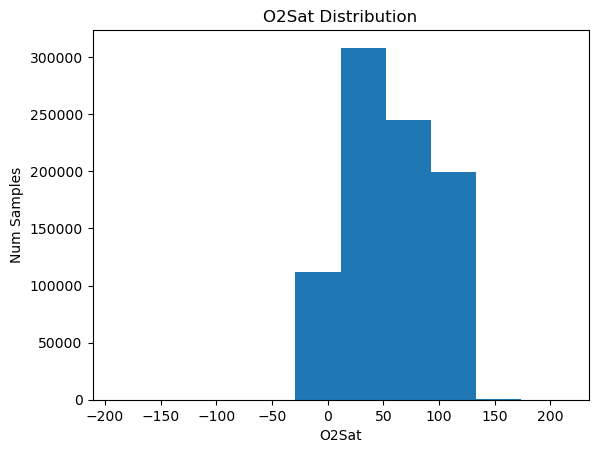

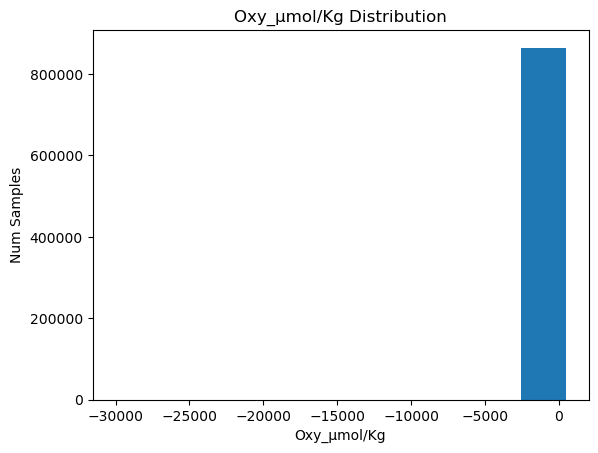

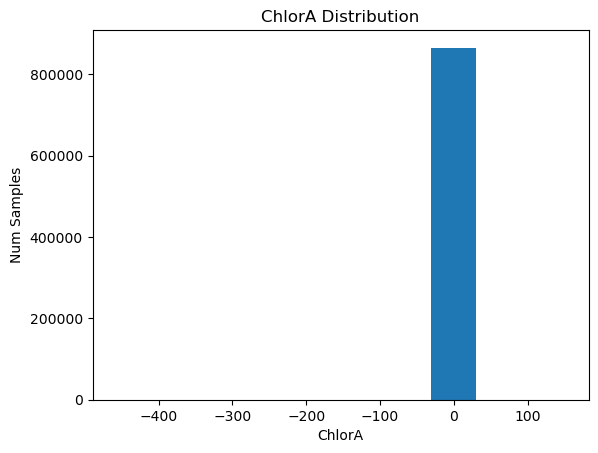

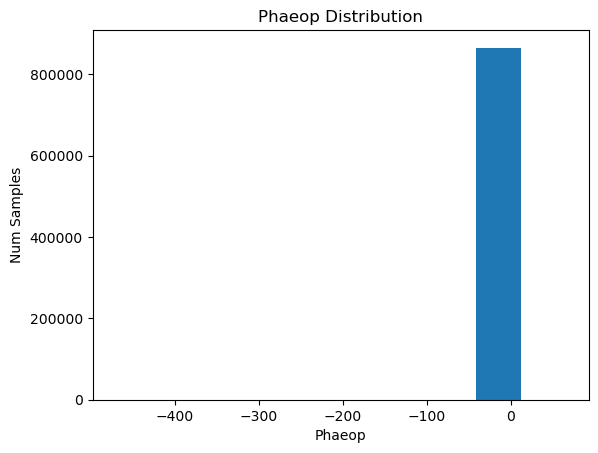

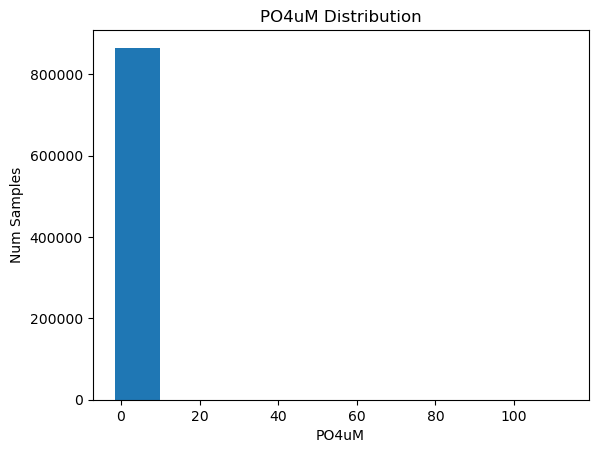

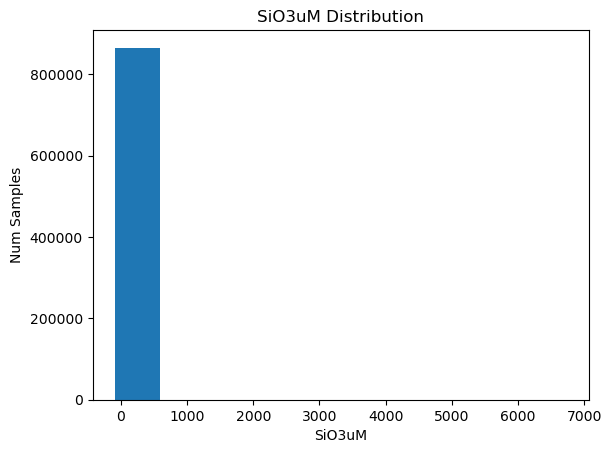

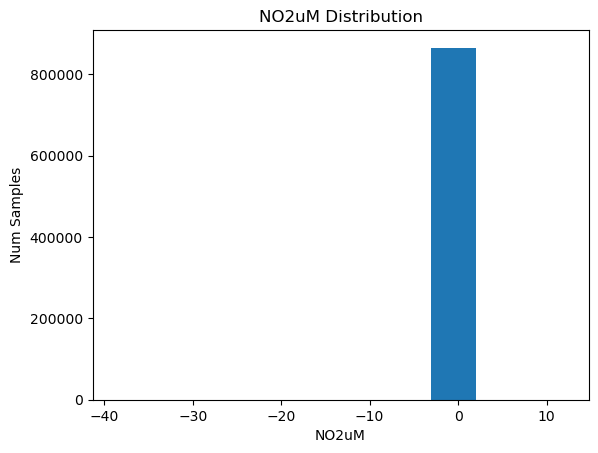

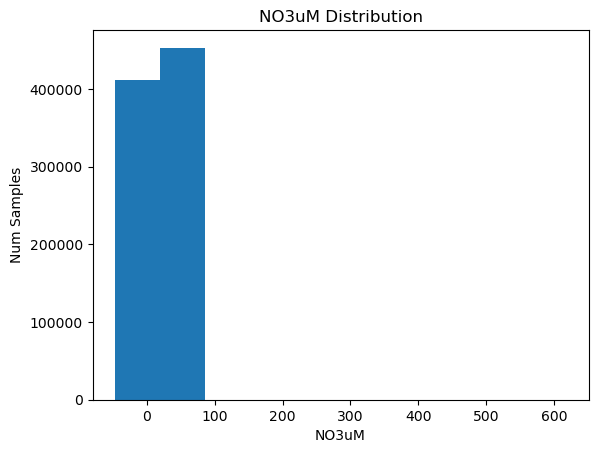

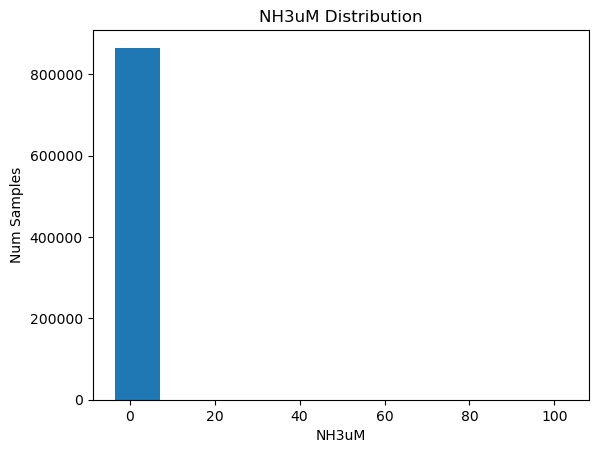

In [70]:
#Plot a histogram for each feature
for c in clean_data.columns:
    plt.hist(clean_data[c])
    plt.title(f"{c} Distribution")
    plt.xlabel(c)
    plt.ylabel("Num Samples")
    plt.show()

Many of these distributions appear to have most of their data concentrated on the left, with long tails to the left. In other words, there are a few outliers skewing the distributions. These outliers can be better visualized in the scatter plots below.

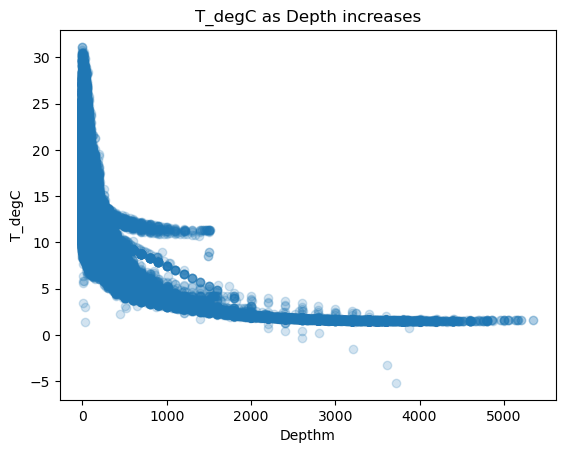

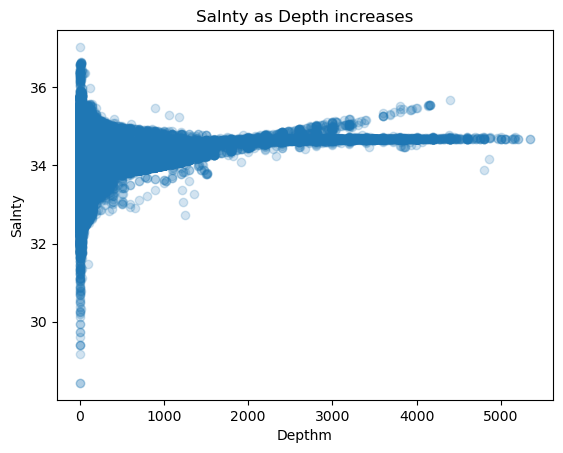

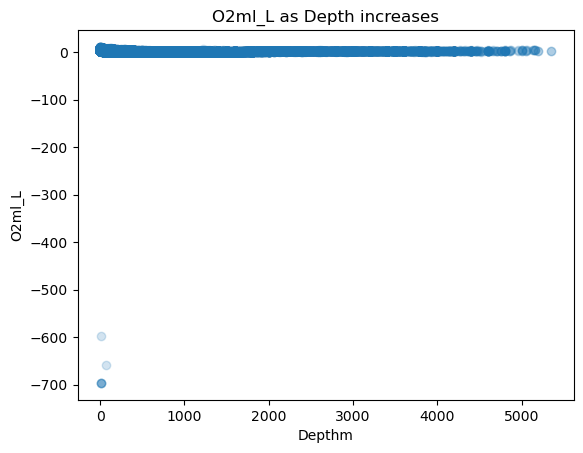

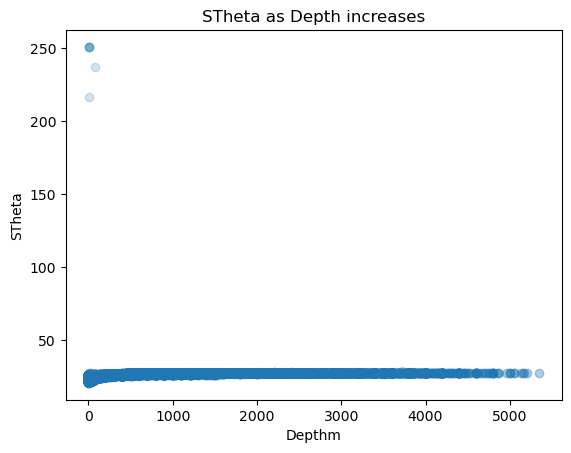

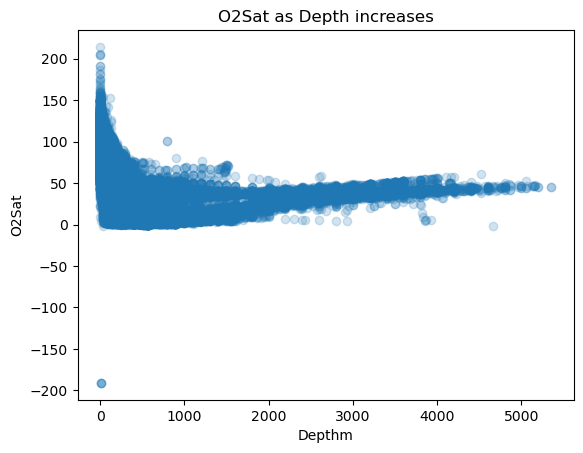

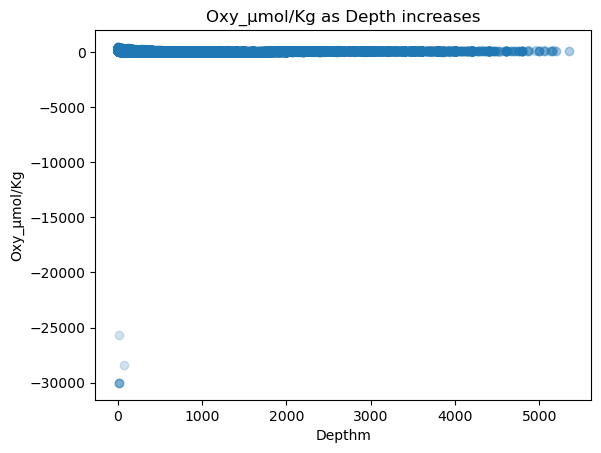

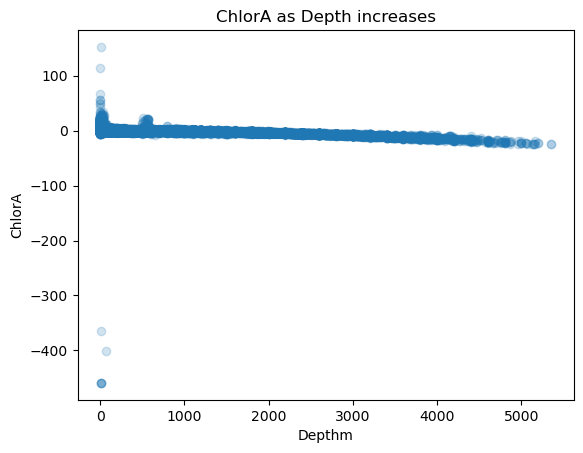

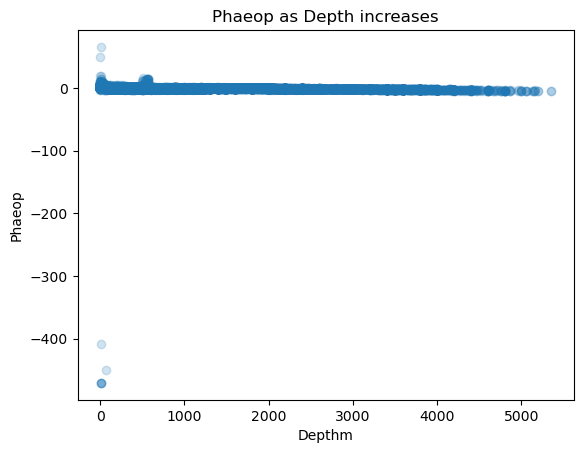

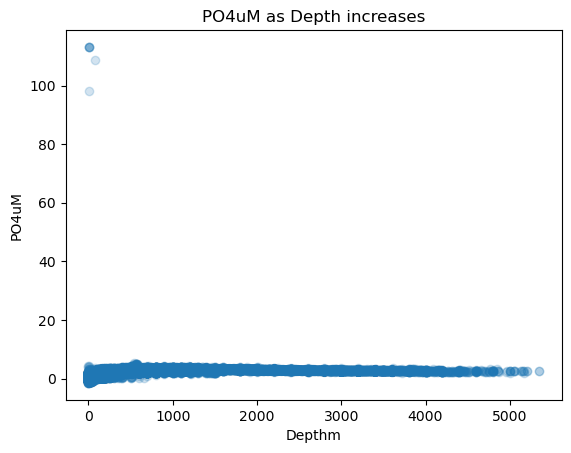

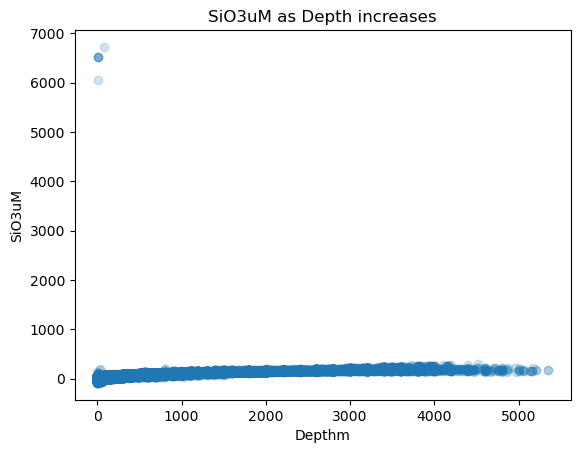

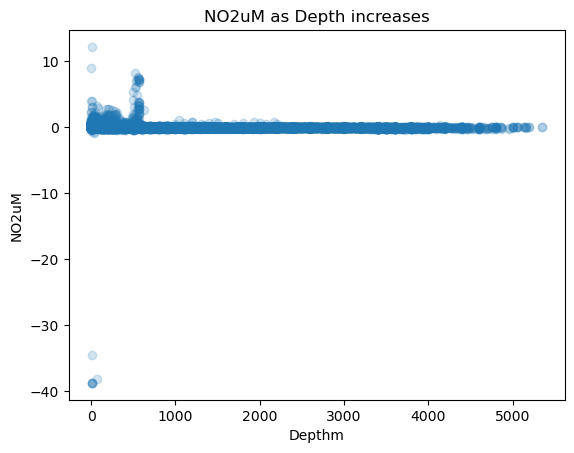

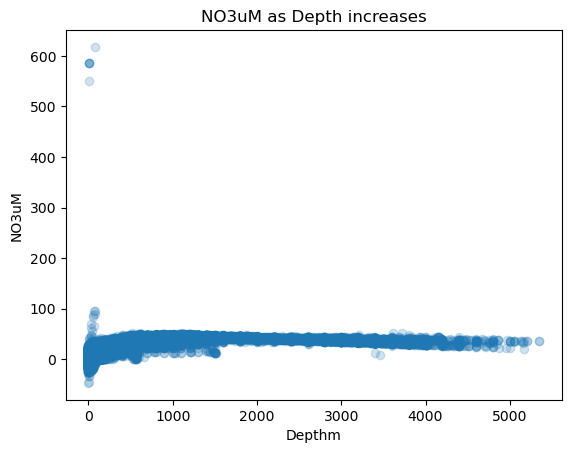

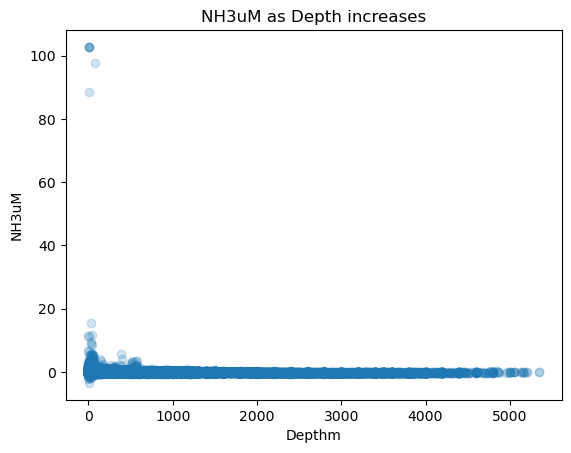

In [71]:
#Plot each feature against Depthm
columns_to_plot = ["T_degC", "Salnty", "O2ml_L", "STheta", "O2Sat", 
                   "Oxy_µmol/Kg", "ChlorA", "Phaeop", "PO4uM", "SiO3uM", "NO2uM", "NO3uM", "NH3uM"]

for c in columns_to_plot:
    plt.scatter(clean_data["Depthm"], clean_data[c], alpha=0.2)
    plt.xlabel("Depthm")
    plt.ylabel(c)
    plt.title(f"{c} as Depth increases")
    plt.show()

A few features appear to be exponentially or logarithmically related to the depth, but there are a few outliers that make the behavior of features difficult to understand. These samples can be dropped.

In [72]:
clean_data.sort_values("O2ml_L").head(10)

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,ChlorA,Phaeop,PO4uM,SiO3uM,NO2uM,NO3uM,NH3uM
852223,10.0,16.642,33.1288,-696.249387,250.7840,-190.965077,-30029.179420,-459.004181,-470.673328,113.199053,6521.522717,-38.773983,586.139202,102.712966
852222,10.0,16.642,33.1288,-696.249387,250.7840,-190.965077,-30029.179420,-459.004181,-470.673328,113.199053,6521.522717,-38.773983,586.139202,102.712966
852221,9.0,16.642,33.1288,-696.249057,250.7840,-190.974880,-30029.165501,-459.000021,-470.671979,113.199094,6521.470146,-38.773884,586.141148,102.713029
852224,9.0,16.642,33.1288,-696.249057,250.7840,-190.974880,-30029.165501,-459.000021,-470.671979,113.199094,6521.470146,-38.773884,586.141148,102.713029
847558,74.0,15.556,33.0599,-659.153404,237.1793,105.020000,-28421.947800,-401.233438,-450.624025,108.786968,6723.474168,-38.199392,617.715354,97.514778
847549,10.0,18.893,33.0359,-596.515181,216.5753,101.540000,-25720.862881,-365.263964,-408.120168,98.163388,6061.012045,-34.560545,550.656885,88.342848
705807,569.0,6.480,34.2610,-0.010000,26.9140,-0.100000,-0.434895,0.441841,1.343584,3.710000,107.400000,0.010000,25.900000,0.208380
747450,557.0,6.440,34.2410,-0.010000,26.9030,-0.100000,-0.434899,1.426290,2.399529,4.180000,115.500000,0.180000,17.200000,0.515148
691047,563.0,6.310,34.2290,-0.010000,26.9110,-0.100000,-0.434896,1.093421,1.812713,4.050000,112.000000,0.140000,25.100000,0.395361
747449,551.0,6.450,34.2400,-0.010000,26.9010,-0.100000,-0.434900,1.368442,2.306129,4.110000,115.100000,0.150000,17.600000,0.469249


It looks like the outliers for all features occur when O2ml_L is between -500 and -700. These few samples can be filtered out of the dataset

In [73]:
data = clean_data[clean_data["O2ml_L"] > -500]

In [74]:
data.sort_values("O2ml_L")

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,ChlorA,Phaeop,PO4uM,SiO3uM,NO2uM,NO3uM,NH3uM
705807,569.0,6.48,34.26100,-0.01,26.914000,-0.100000,-0.434895,0.441841,1.343584,3.71,107.4,0.01000,25.900000,0.208380
691047,563.0,6.31,34.22900,-0.01,26.911000,-0.100000,-0.434896,1.093421,1.812713,4.05,112.0,0.14000,25.100000,0.395361
747450,557.0,6.44,34.24100,-0.01,26.903000,-0.100000,-0.434899,1.426290,2.399529,4.18,115.5,0.18000,17.200000,0.515148
747449,551.0,6.45,34.24000,-0.01,26.901000,-0.100000,-0.434900,1.368442,2.306129,4.11,115.1,0.15000,17.600000,0.469249
807729,568.0,6.54,34.25800,0.00,26.904000,0.000000,0.000000,2.118715,2.855216,4.23,129.9,0.01000,12.100000,0.240000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412316,4.0,12.50,34.46161,10.01,23.879573,76.408933,433.528188,8.750367,5.192142,0.46,0.0,0.41757,10.973079,-0.710700
758527,1.0,20.49,33.28400,10.57,23.326000,204.400000,461.296000,55.250000,2.210000,0.20,2.4,0.03000,0.400000,2.011828
758526,0.0,20.49,33.28000,10.57,23.320000,204.400000,461.298700,55.250000,2.210000,0.20,2.4,0.03000,0.400000,2.010210
758528,2.0,20.31,33.28100,10.69,23.371000,206.000000,466.512500,50.540000,3.100000,0.19,2.4,0.07000,0.400000,1.689198


Those values look better. clean_data can be replaced with this data and visualized again

In [75]:
clean_data = data

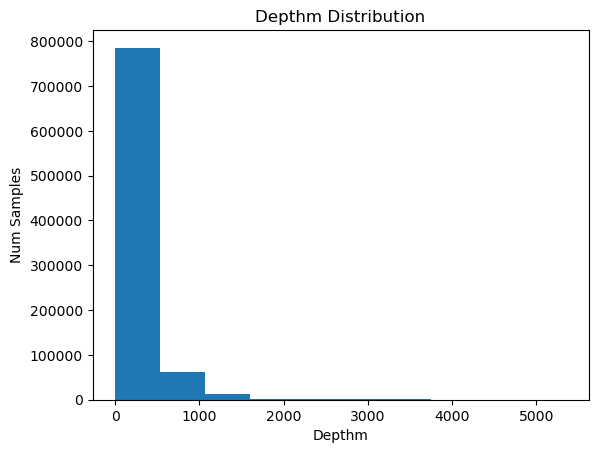

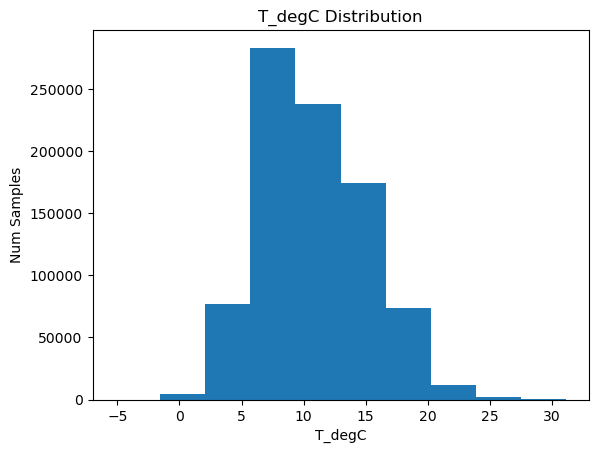

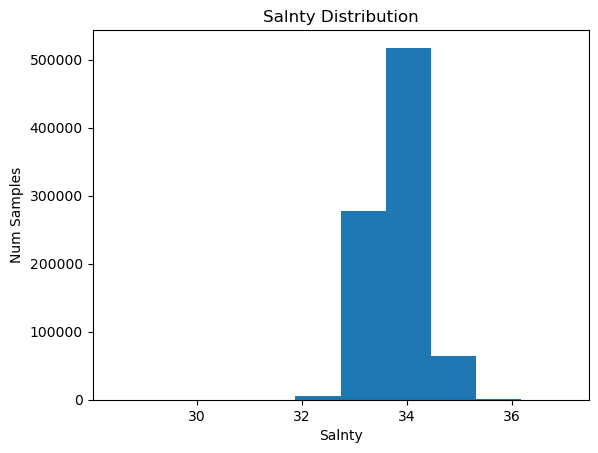

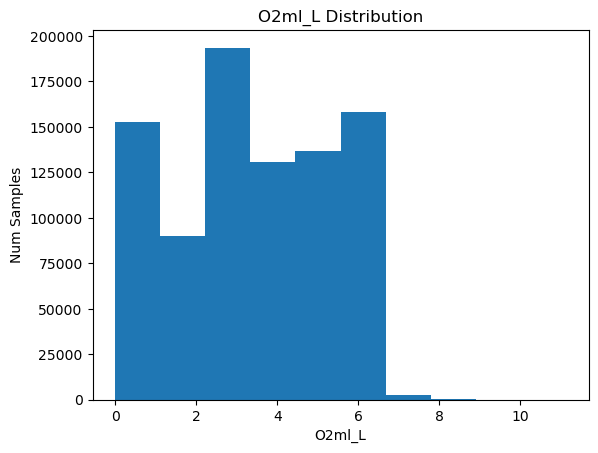

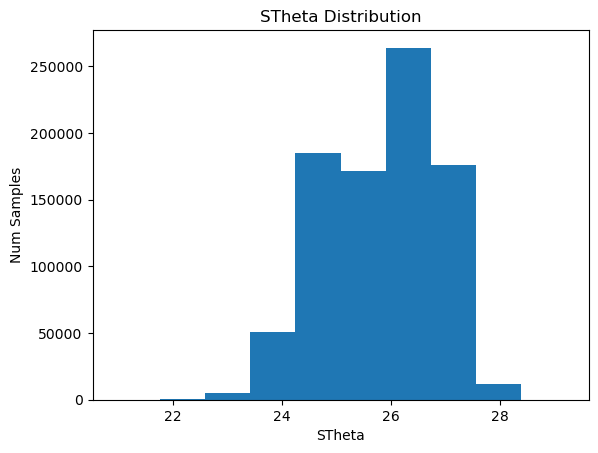

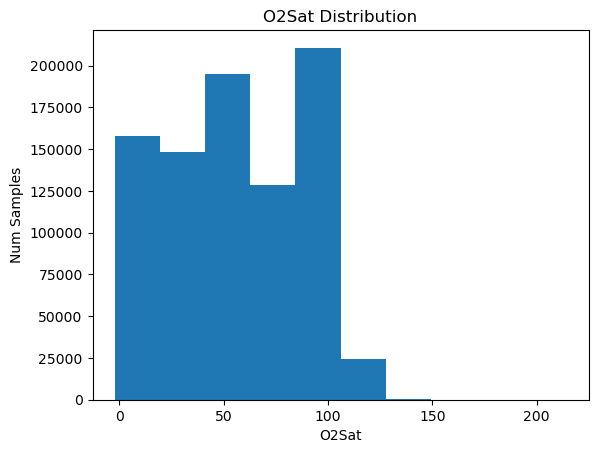

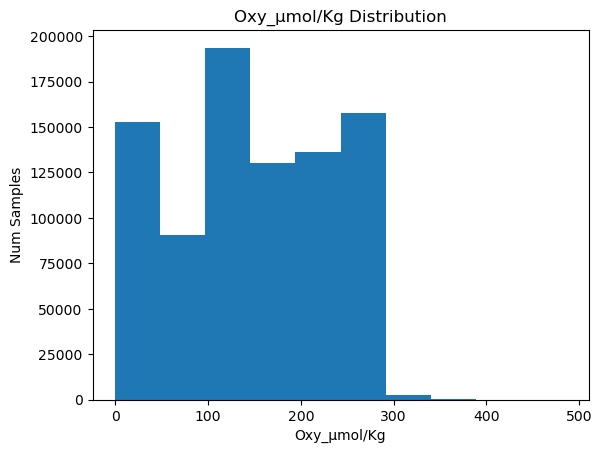

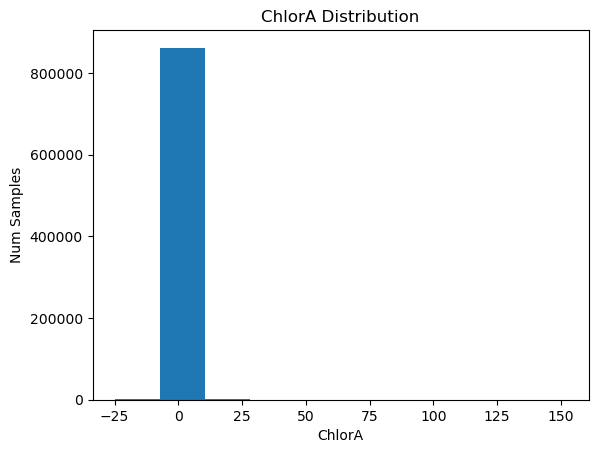

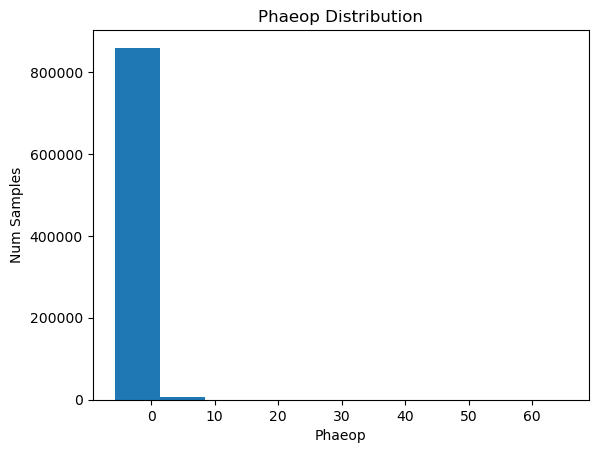

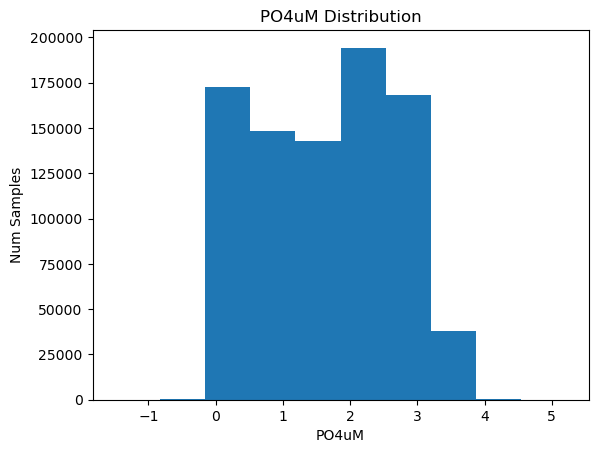

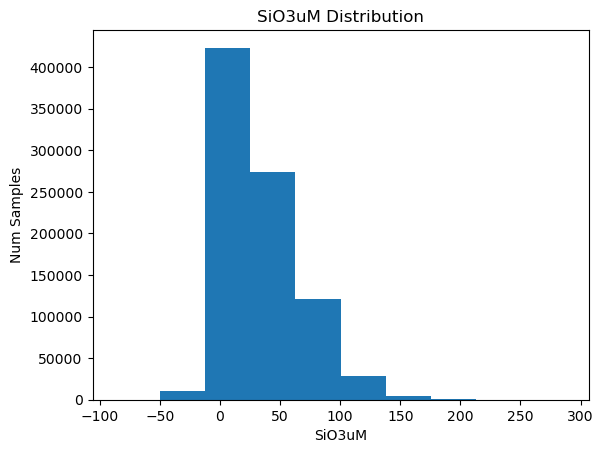

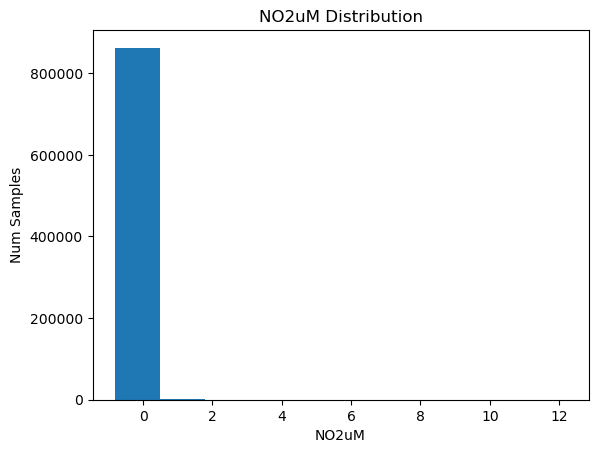

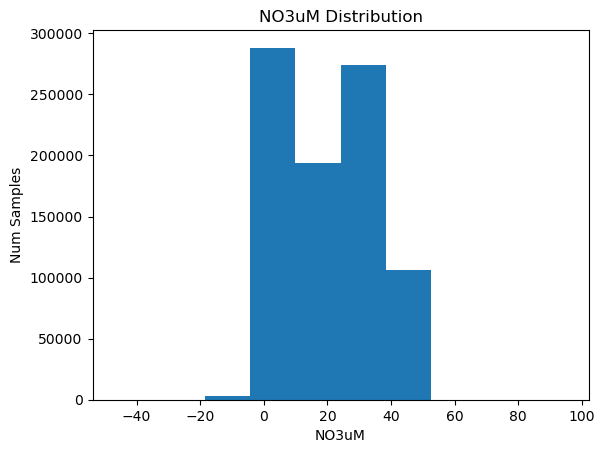

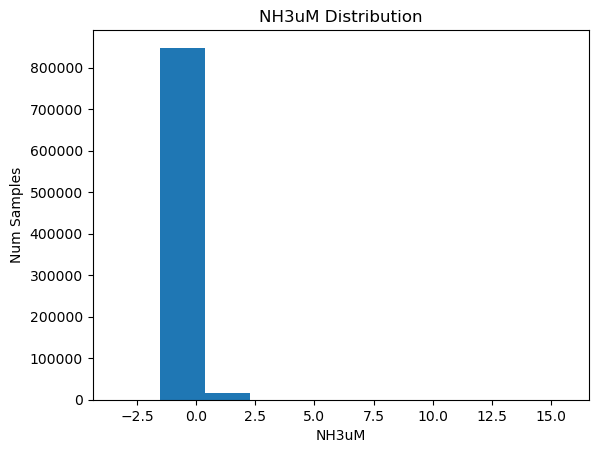

In [76]:
#Plot a histogram of each feature
for c in clean_data.columns:
    plt.hist(clean_data[c])
    plt.title(f"{c} Distribution")
    plt.xlabel(c)
    plt.ylabel("Num Samples")
    plt.show()

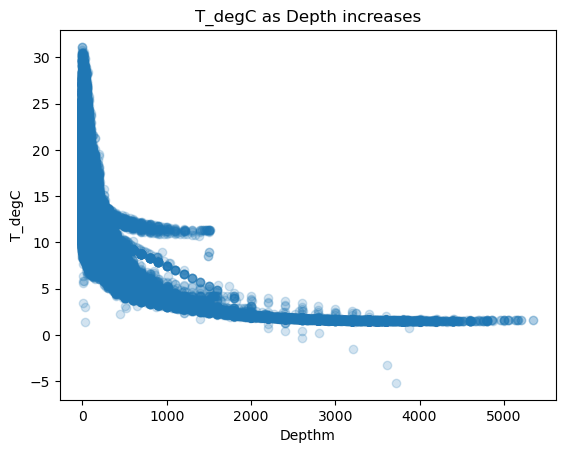

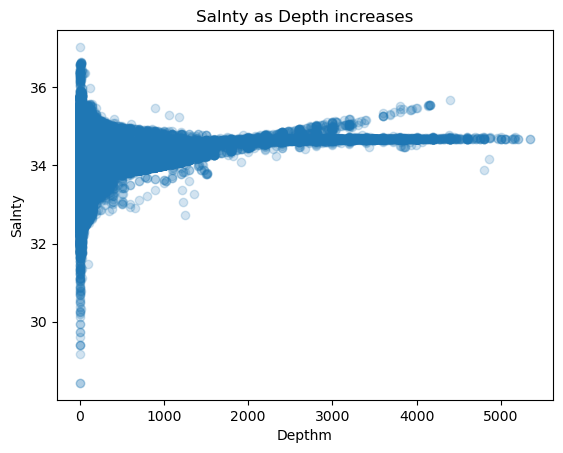

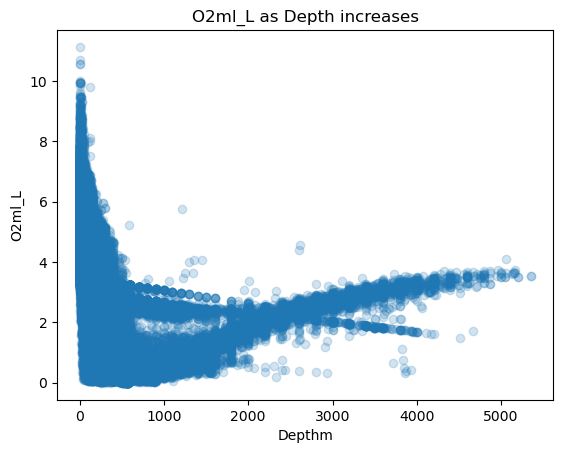

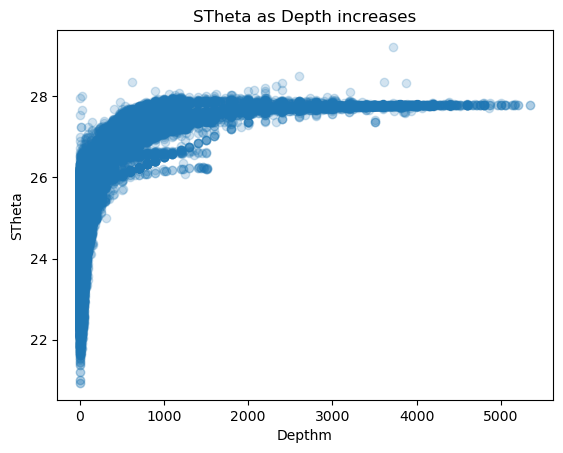

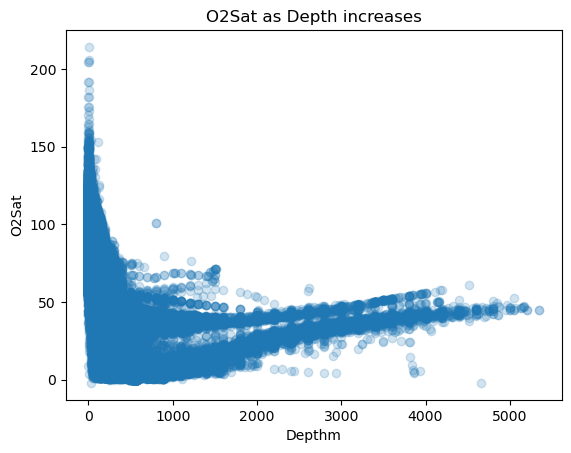

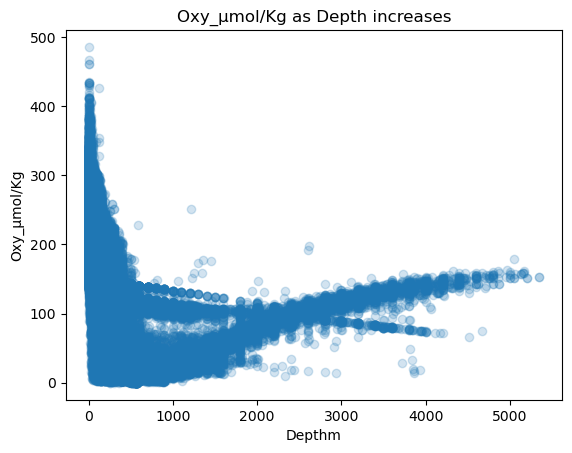

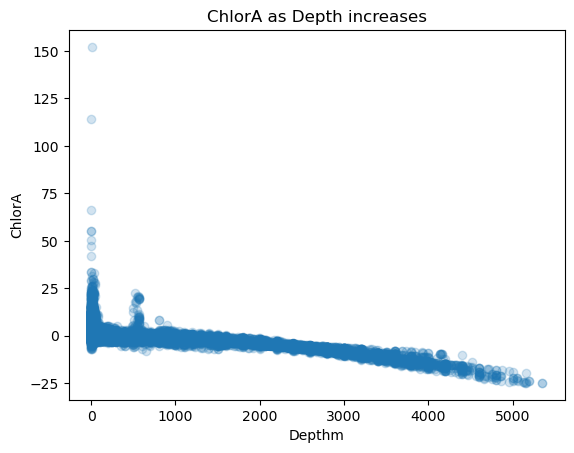

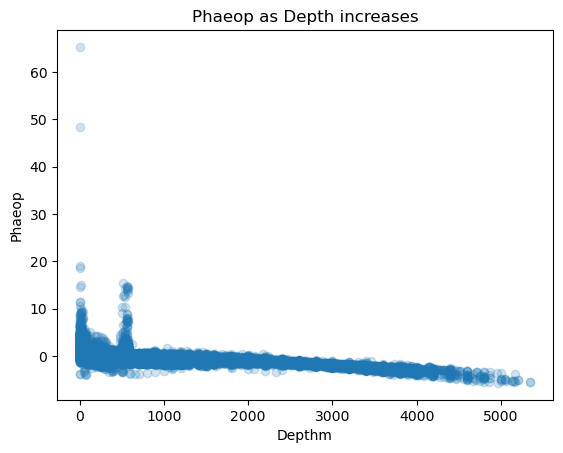

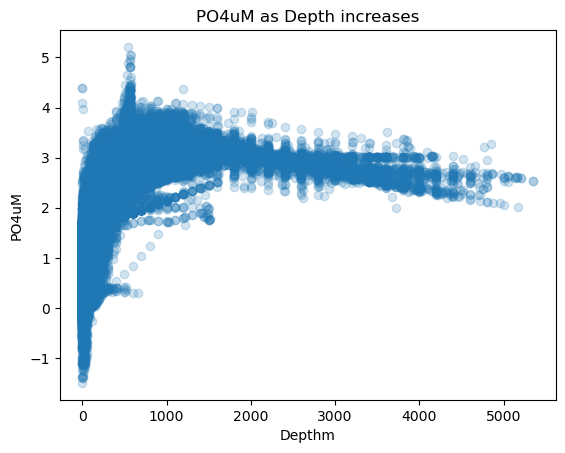

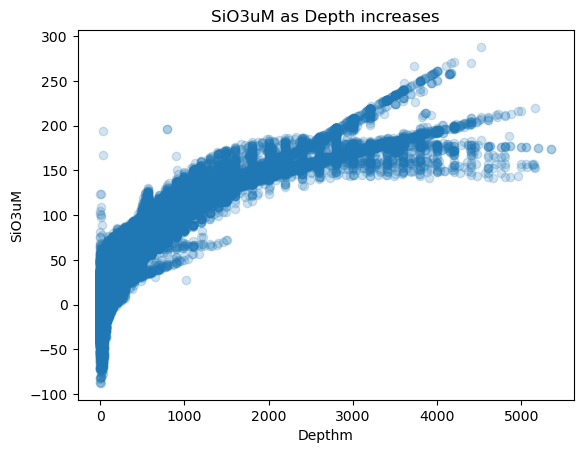

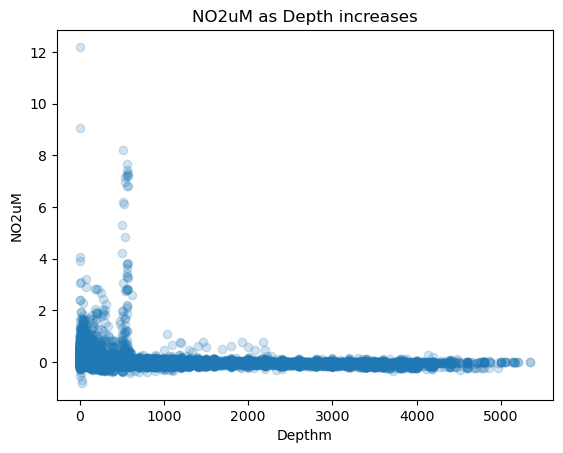

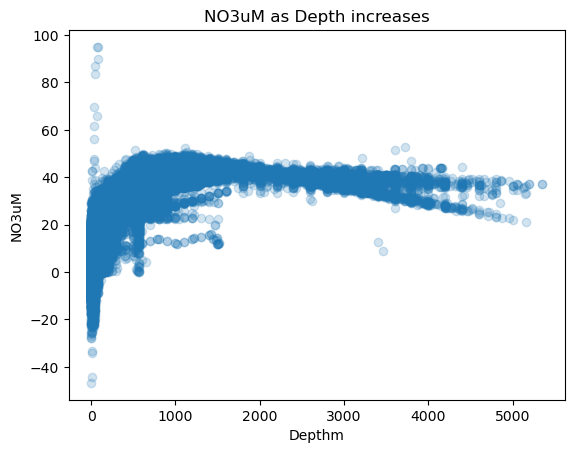

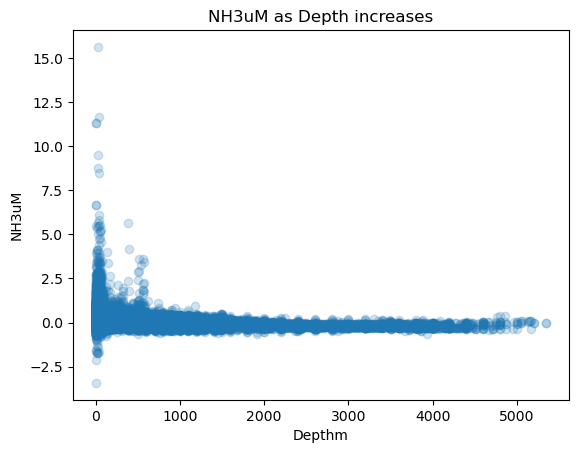

In [77]:
#Plot each feature against Depthm
columns_to_plot = ["T_degC", "Salnty", "O2ml_L", "STheta", "O2Sat", 
                   "Oxy_µmol/Kg", "ChlorA", "Phaeop", "PO4uM", "SiO3uM", "NO2uM", "NO3uM", "NH3uM"]

for c in columns_to_plot:
    plt.scatter(clean_data["Depthm"], clean_data[c], alpha=0.2)
    plt.xlabel("Depthm")
    plt.ylabel(c)
    plt.title(f"{c} as Depth increases")
    plt.show()

There appears to be a logarithmic relationship (positive or negative) between depth and all other features. This means as the depth increases, the values of the features begin to level off. This makes sense, as wildlife can only survive in certain conditions. If features, such as the concentration of salt (salinity) continued to increase exponentially or even linearly, conditions would become too harsh for wildlife to survive. Thus, the leveling off of various chemical concentrations in ocean water supports the discovery of life at all depths of the ocean.

Some additional relationships can be explored as well, such as the relationship between temperature and salinity or temperature and oxygen concentration.

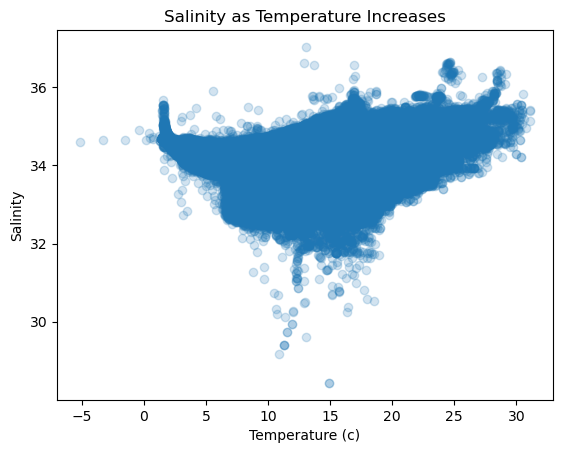

In [78]:
#Plot relationship between temperature and salinity
plt.scatter(clean_data["T_degC"], clean_data["Salnty"], alpha=0.2)
plt.title("Salinity as Temperature Increases")
plt.xlabel("Temperature (c)")
plt.ylabel("Salinity")
plt.show()

There appears to be a slight linear relationship between temperature and salinity, which could be an opportunity for a regression analysis.

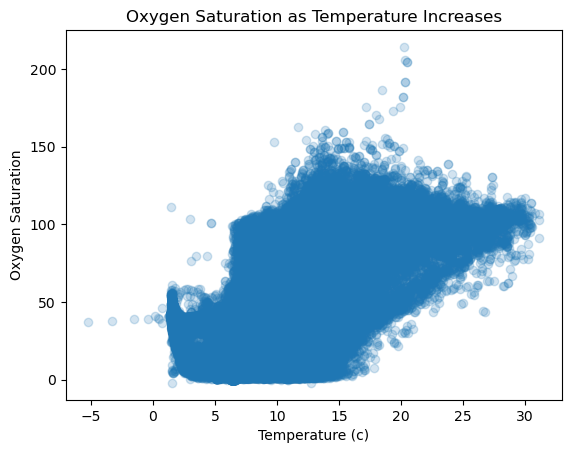

In [79]:
#Plot temperature and o2 saturation
plt.scatter(clean_data["T_degC"], clean_data["O2Sat"], alpha=0.2)
plt.title("Oxygen Saturation as Temperature Increases")
plt.xlabel("Temperature (c)")
plt.ylabel("Oxygen Saturation")
plt.show()

There also appears to be a slight linear relationship between temperature and o2 saturation. It is possible that there exists a linear relationship between temperature and other features as well.

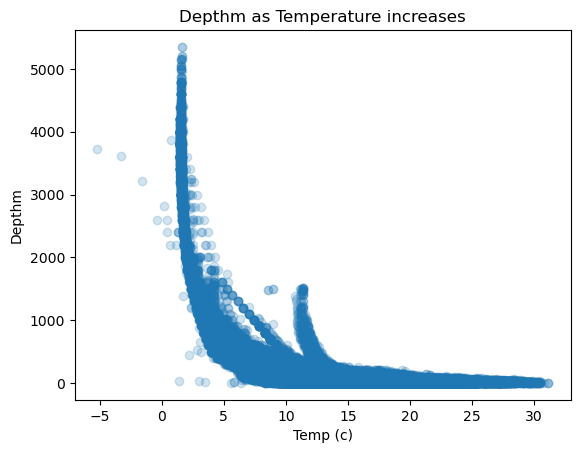

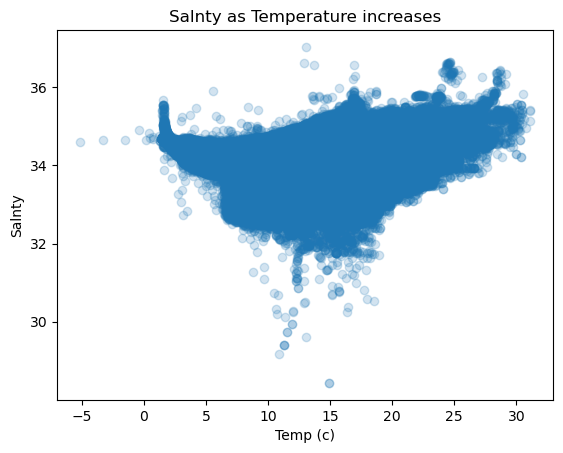

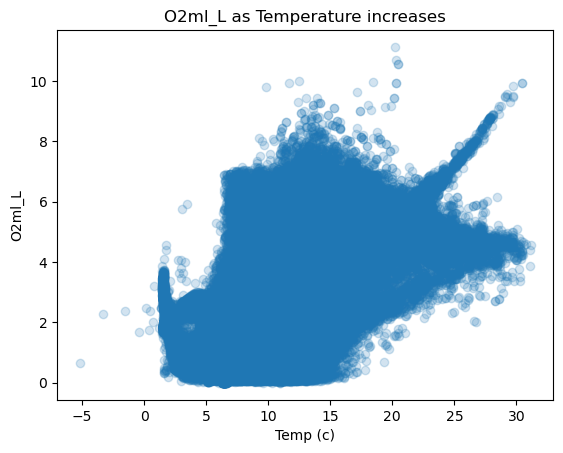

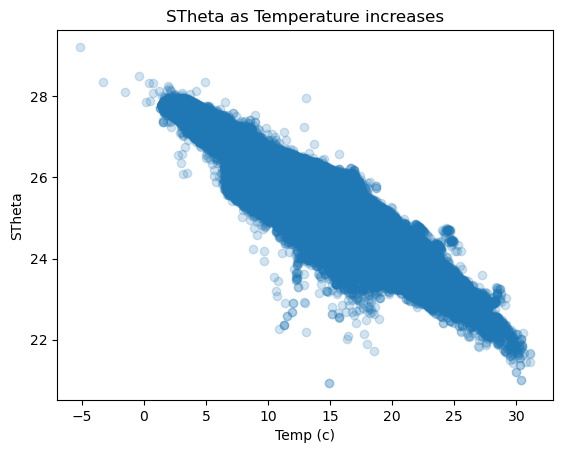

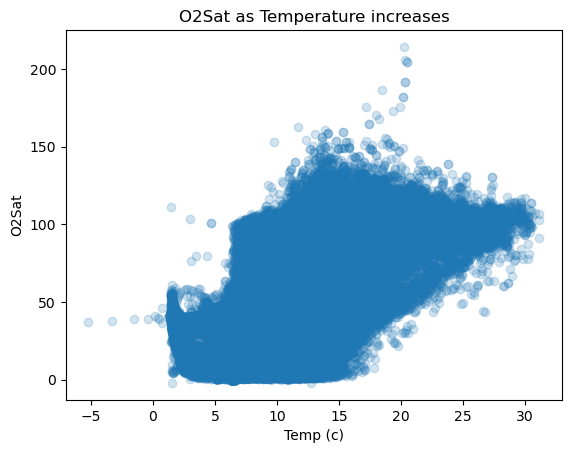

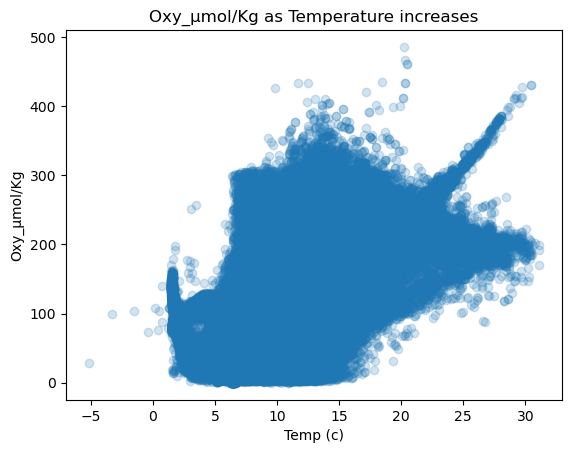

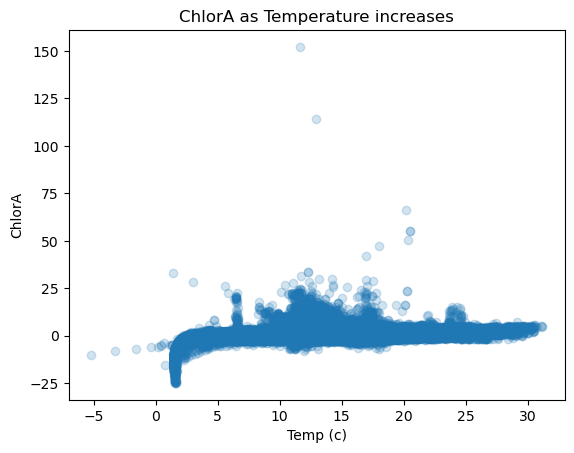

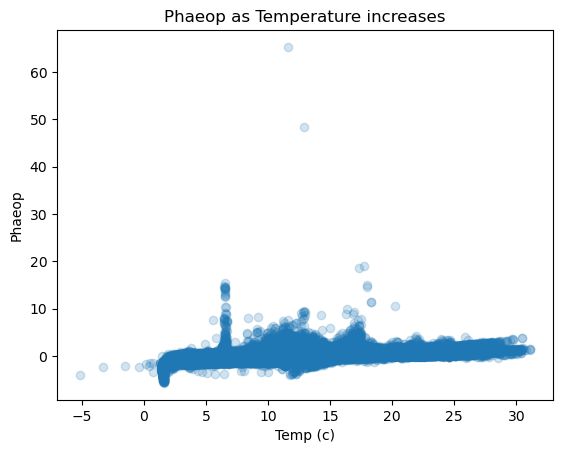

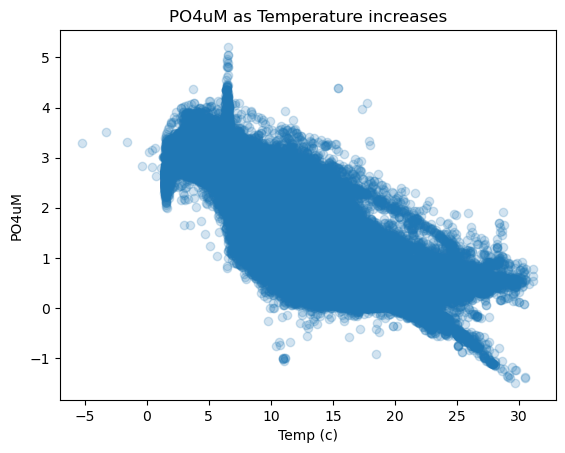

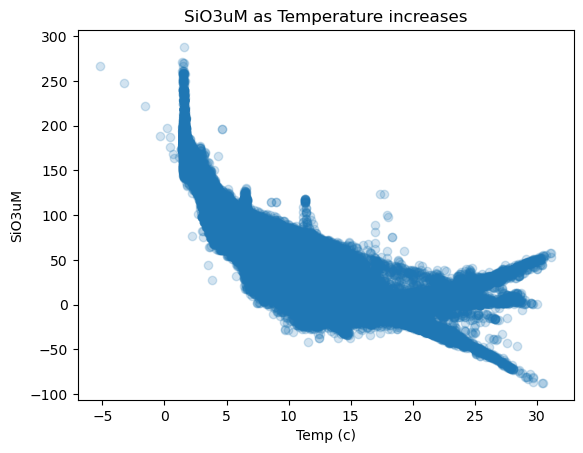

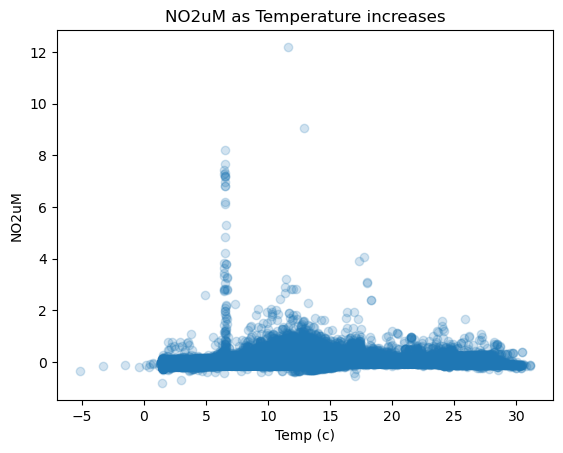

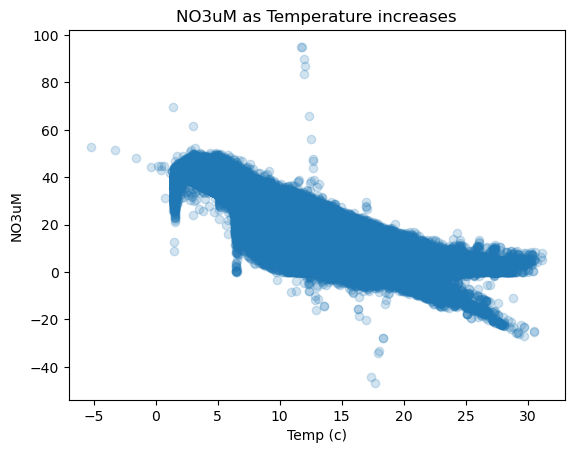

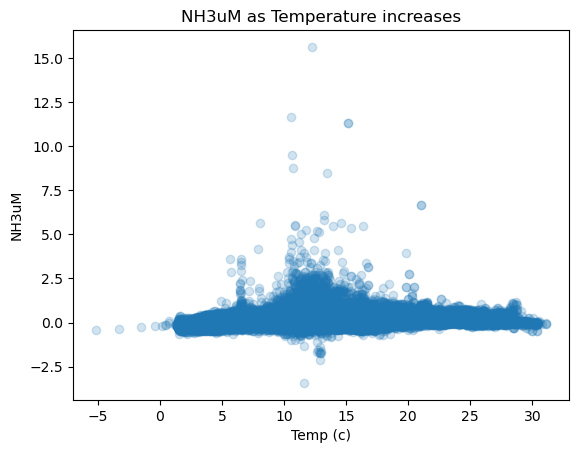

In [80]:
#Plot all columns against temperature to see if there are any more linear relationships
columns_to_plot = ["Depthm", "Salnty", "O2ml_L", "STheta", "O2Sat", 
                   "Oxy_µmol/Kg", "ChlorA", "Phaeop", "PO4uM", "SiO3uM", "NO2uM", "NO3uM", "NH3uM"]

for c in columns_to_plot:
    plt.scatter(clean_data["T_degC"], clean_data[c], alpha=0.2)
    plt.xlabel("Temp (c)")
    plt.ylabel(c)
    plt.title(f"{c} as Temperature increases")
    plt.show()

As expected, there are some additional linear relationships present in the dataset. For example, there appears to be a negative correlation between PO4uM/temperature and STheta/temperature, with some positive correlations between salinity/temperature and oxygen/temperature. There appears to be a possible linear relationship between ChlorA/temperature and Phaeop/temperature, but the behavior of this data could also be logarithmically related rather than linearly. Additional data may be necessary to extract more meaningful insights into the behavior of these specific features. 

## Regression Analysis

One of the most important pieces of information extracted from an ocean sample is the salinity, or concentration of salt. Virtually all ocean-dwelling creatures will suffer if the salinity in the water increases or decreases too much. However, salinity can be difficult to identify for the average person who does not have access to a lab. Fortunately, there appears to be a linear relationship between temperature and salinity, indicating that the temperature could help to predict the levels of salt in the water. Temperature can be identified easily using a thermometer, meaning temperature data can be gathered, and the salinity could be predicted from these temperatures. A linear regression analysis can be used to test whether temperature is a good predictor of salinity.

In [28]:
#Extract features from the dataset
reg_data = clean_data[["T_degC", "Salnty"]].copy()
reg_data.rename(columns={"T_degC": "Temp (c)", "Salnty": "Salinity"}, inplace=True)

In [29]:
reg_data

,Temp (c),Salinity
0,10.500,33.4400
1,10.460,33.4400
2,10.460,33.4370
3,10.450,33.4200
4,10.450,33.4210
...,...,...
864858,18.744,33.4083
864859,18.744,33.4083
864860,18.692,33.4150
864861,18.161,33.4062


In [33]:
#Split data into training and test sets

train_set, test_set = train_test_split(reg_data, test_size=0.2, random_state=42)

In [34]:
#Calculate correlation
train_set["Temp (c)"].corr(train_set["Salinity"])

-0.5070602801480215

As seen above, the correlation value is approximately -0.51, indicating that as temperature increases, the salinity decreases. The scatter plot in the exploratory data analysis confirms this.

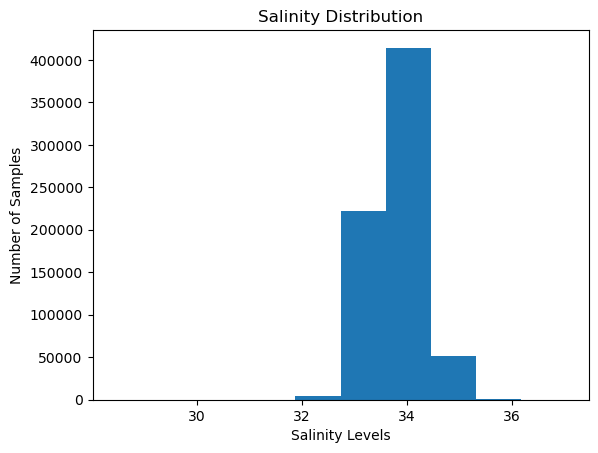

In [81]:
#Review distribution of salinity and temperature from the training set
plt.hist(train_set["Salinity"])
plt.title("Salinity Distribution")
plt.xlabel("Salinity Levels")
plt.ylabel("Number of Samples")
plt.show()

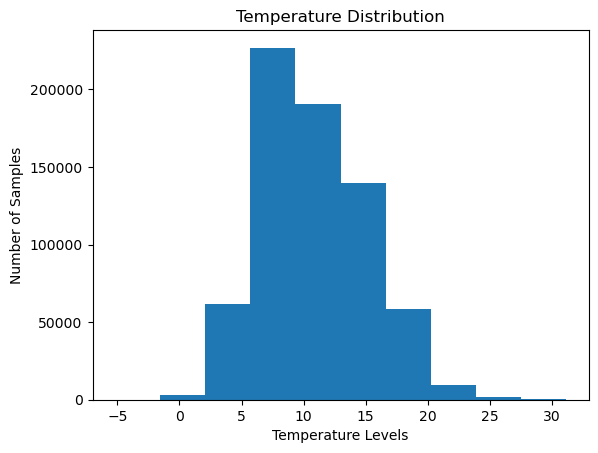

In [82]:
plt.hist(train_set["Temp (c)"])
plt.title("Temperature Distribution")
plt.xlabel("Temperature Levels")
plt.ylabel("Number of Samples")
plt.show()

The distributions of the training dataset resemble those from the population dataset. Therefore, the sample resembles the larger population and can be trusted to make accurate predictions.

In [41]:
#Split into feature and label
feature = train_set[["Temp (c)"]]
target = train_set["Salinity"]

In [42]:
#Create a ridge regression pipeline

#Estbalish parameters
param = [
        {'ridge__alpha': loguniform(0.000001, 10)},
    ]

#Create pipeline with a standardization step
ridge_pipeline = Pipeline([("preprocessing", StandardScaler()), ("ridge", Ridge())])

#Use RandomizedSearchCV to find the best value for the alpha parameter
ridge_reg = RandomizedSearchCV(ridge_pipeline, param, cv=3,
                           scoring='neg_root_mean_squared_error')

#Fit the model (with the best alpha value) with the feature and target
ridge_reg.fit(feature, target)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              StandardScaler()),
                                             ('ridge', Ridge())]),
                   param_distributions=[{'ridge__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000029CE5EC5350>}],
                   scoring='neg_root_mean_squared_error')

In [44]:
#Review the best alpha value chosen
ridge_reg.best_params_

{'ridge__alpha': 4.53975787304471e-05}

In [46]:
#Use cross_val_score to assess the model's ability to generalize
ridge_cvs = -cross_val_score(ridge_reg, feature, target, scoring="neg_root_mean_squared_error", cv=10)

In [47]:
pd.Series(ridge_cvs).describe()

count    10.000000
mean      0.391642
std       0.001388
min       0.389339
25%       0.391310
50%       0.391920
75%       0.392301
max       0.393390
dtype: float64

The mean MSE is 0.39, which means the model is able to make accurate predictions and is able to generalize fairly well. The standard deviation of the MSE is incredibly small, also indicating the accuracy is consistent across samples. These results make sense, as the model chosen was a Ridge Regression model rather than a simple regression model. Ridge Regression models help to implement regularization, resulting in a model that is capable of generalizing very well. Calculating the MSE for the training set will confirm these findings, and will help to identify any underfitting or overfitting present in the model.

In [48]:
#Predict values from the training set
ridge_pred = ridge_reg.predict(feature).tolist()

#Create a dataframe comparing the predicted salinity and the actual salinity
ridge_data = {"Predictions": ridge_pred, "Actual": target.tolist()}
pred_actual = pd.DataFrame(ridge_data)

#Calculate the MSE from the predictions on the training set
ridge_rsme = mean_squared_error(pred_actual["Actual"], pred_actual["Predictions"], squared=False)
ridge_rsme

0.3916427852892451

In [50]:
ridge_r2 = r2_score(pred_actual["Actual"], pred_actual["Predictions"])
print(f'R-squared score: {round(ridge_r2, 2)}')

R-squared score: 0.26


In [49]:
pred_actual

,Predictions,Actual
0,33.786582,32.9640
1,33.940402,33.2400
2,34.066566,34.2451
3,33.442944,33.5670
4,33.783855,33.5400
...,...,...
691880,34.020584,34.2130
691881,33.707491,33.5840
691882,33.719491,33.5470
691883,33.759855,33.2430


The MSE from the validation set and the MSE from the training set are both small, and very close in value. This means there is no underfitting or overfitting. The table of predictions and truth values confirm this, as some predictions deviate slightly from the ground truth values, but not by much to be considered incorrect. However, because the training set was used in the cross validation process, it is not surprising that the MSE values are the same. In order to say definitively whether the model generalizes well, it needs to be tested using the test dataset.

The r2 score was also calculated, and its value is lower than expected. The low r2 score and low MSE score indicates that the model has good prediction power, but that the feature and target are not strongly correlated. This can be confirmed by the calculated correlation value of -0.51, which indicates a slight negative correlation. Thus, the model can still be used to predict values, and it is expected to do so fairly well. 

In [ ]:
#Test model using the test dataset

In [51]:
test_set

,Temp (c),Salinity
106508,6.470000,33.791257
204221,4.880000,34.527000
565690,15.107093,33.692689
468811,13.490000,33.360000
568636,11.591798,33.803791
...,...,...
586491,19.530000,33.604000
839174,7.060000,34.153000
87031,4.300000,33.924277
42195,4.610000,34.359000


In [52]:
test_feature = test_set[["Temp (c)"]]
test_targets = test_set["Salinity"]

In [54]:
#Predict values from the test set
ridge_test_pred = ridge_reg.predict(test_feature).tolist()

#Create a DataFrame with the predictions and ground truths
ridge_test_results = {"Predictions": ridge_test_pred, "Actual": test_targets.tolist()}
results = pd.DataFrame(ridge_test_results)

#Calculate MSE for the test set
ridge_rsme = mean_squared_error(results["Actual"], results["Predictions"], squared=False)
ridge_rsme

0.39254494420346786

In [128]:
results

,Predictions,Actual
0,33.997110,34.270
1,34.008525,34.550
2,33.662461,33.760
3,33.700336,33.580
4,33.850799,33.600
...,...,...
172924,33.975838,34.198
172925,33.517706,33.400
172926,33.864289,33.650
172927,33.852355,33.709


The MSE value calculated for the test set is aproximately 0.393, which is very close to the calculated MSE value from the training and validation sets. This means the model is able to generalize well to unseen data, and can be used to reliably predict the salinity of a sample based on its temperature.